In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("kc_house_data.csv")
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df_copy=df.copy()
del df_copy['id']
df_copy.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )

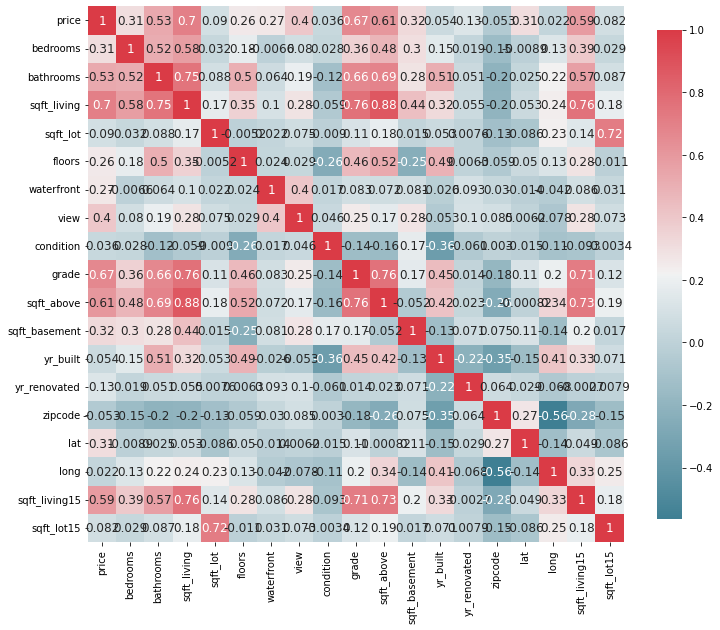

In [7]:
plot_correlation_map(df_copy)

In [8]:
df_copy[["price", "zipcode"]].groupby(["zipcode"], as_index=True).mean()

,price
zipcode,
98001,2.808047e+05
98002,2.342840e+05
98003,2.941113e+05
98004,1.355927e+06
98005,8.101649e+05
...,...
98177,6.761854e+05
98178,3.106128e+05
98188,2.890783e+05


In [9]:
df_copy[["price", "grade"]].groupby(["grade"], as_index=True).mean()

,price
grade,
1,1.420000e+05
3,2.056667e+05
4,2.143810e+05
5,2.485240e+05
6,3.019196e+05
7,4.025903e+05
8,5.428528e+05
9,7.735132e+05
10,1.071771e+06


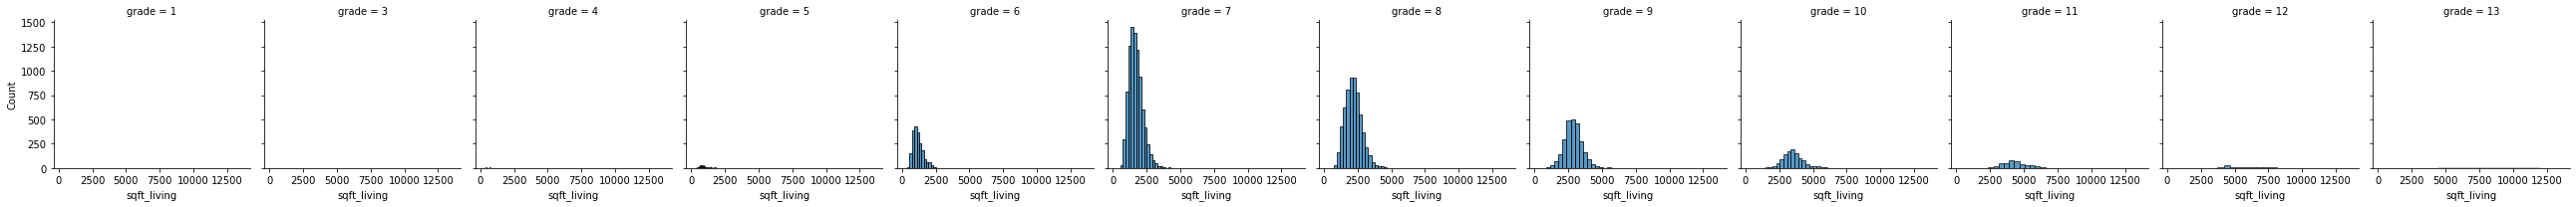

In [10]:
g_liv=sns.FacetGrid(df_copy,col='grade')
g_liv.map(sns.histplot,'sqft_living',bins=20)

In [11]:
df_copy[["sqft_living", "grade"]].groupby(["grade"], as_index=True).mean()

,sqft_living
grade,
1,290.000000
3,596.666667
4,660.482759
5,983.326446
6,1191.561335
7,1689.400401
8,2184.748517
9,2868.139962
10,3520.299824


We notice here that as the sqft_living increases, the grade assigned to this house also increases which is predictable.


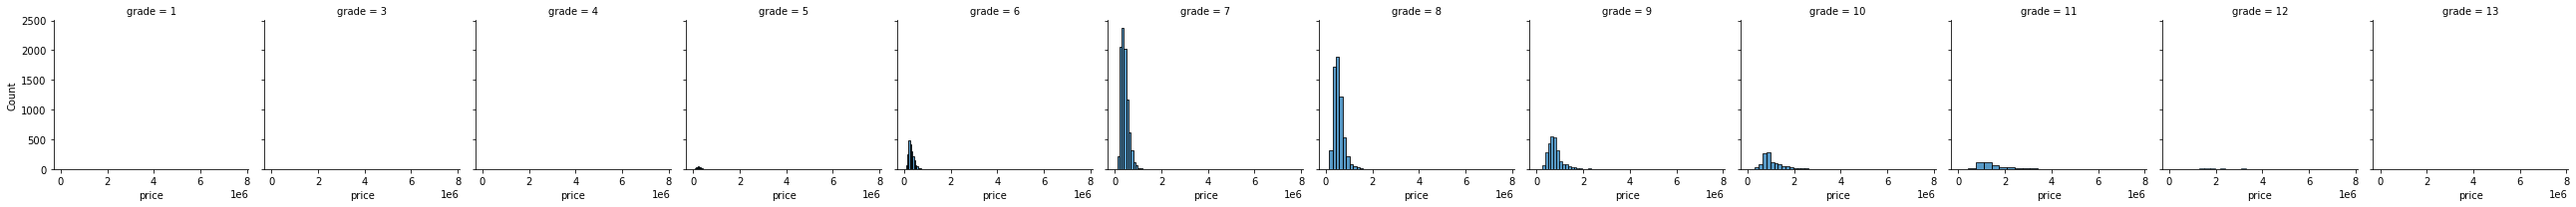

In [12]:
g_liv=sns.FacetGrid(df_copy,col='grade')
g_liv.map(sns.histplot,'price',bins=20)

According to the plot_correlation_map() function, we can note a high positive correlation between (price, sqft_living) (price, bathrooms), (price, sqft_above), (price, grade), (price, sqft_living15), (price, view), (grade, sqft_living).
There is also a high ngative correlation between (zipcode, price), (zipcode, bathrooms), (zipcode, sqft_living), (zipcode, bedrooms) 

C:\Users\Manel-PC\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


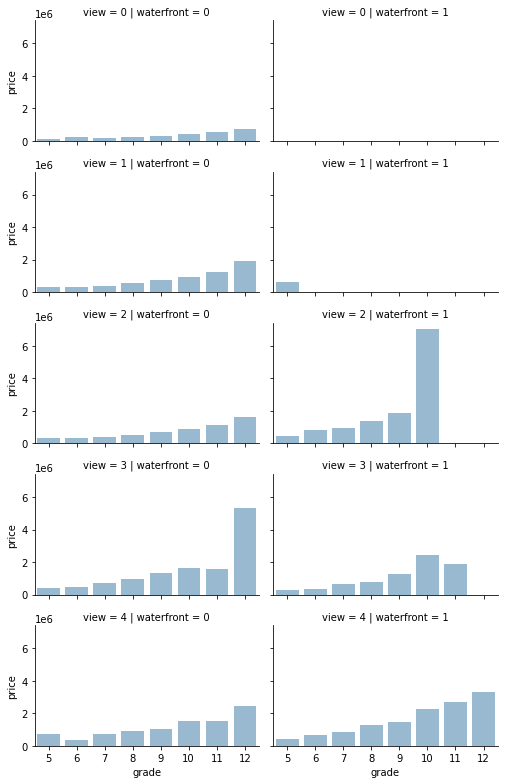

In [13]:
grid = sns.FacetGrid(df_copy, row="view", col="waterfront", height=2.2, aspect=1.6)
grid.map(sns.barplot, "grade","price", alpha=.5, ci=None)
grid.add_legend()

We can note here that the waterfront feature is not important as we can expect, and we can see that, when we compare the number of views and the price for the two cases (waterfront=0 and waterfront=1)

In [16]:
Y=df_copy.price.values.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
StSc=StandardScaler()
Y_transfm=StSc.fit_transform(Y)
print(Y_transfm)

[[-0.86671733]
 [-0.00568792]
 [-0.98084935]
 ...
 [-0.37586519]
 [-0.38158814]
 [-0.58588173]]


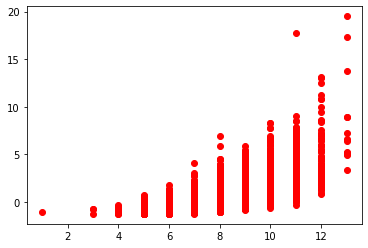

In [17]:
X_grade=df_copy.grade.values.reshape(-1,1)
plt.scatter(X_grade,Y_transfm,color='r')

We notice here a kind of curve, which means that the plynomial model is more suitable than the linear one. But, we will respect the approach of the exercise and we will firstly apply the linear regression.


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_grade, Y_transfm, test_size=0.33, random_state=42)
Lrg_grade=LinearRegression()   #build linear regression model
Lrg_grade.fit(X_train_g,y_train_g)  #fitting the training data
y_predicted=Lrg_grade.predict(X_test_g) #testing our model’s performance
y_rev=StSc.inverse_transform(y_predicted)

print("MSE", mean_squared_error(y_test_g,y_predicted))
print("R squared transfm", metrics.r2_score(y_test_g,y_predicted))

MSE 0.6221451999074774
R squared transfm 0.4399949180922007


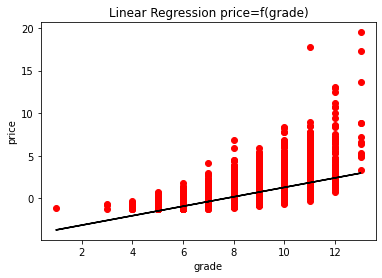

In [31]:
plt.scatter(X_grade,Y_transfm,color='r')
plt.title("Linear Regression price=f(grade)")
plt.ylabel("price")
plt.xlabel("grade")
plt.plot(X_grade,Lrg_grade.predict(X_grade),color="k")
plt.show()

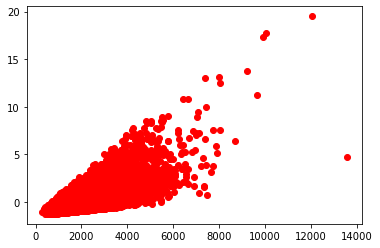

In [18]:
X_sqft_living=df_copy.sqft_living.values.reshape(-1,1)
plt.scatter(X_sqft_living,Y_transfm,color='r')

We observe here a linearity relation

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

X_train_slv, X_test_slv, y_train_slv, y_test_slv = train_test_split(X_sqft_living, Y_transfm, test_size=0.33, random_state=42)
Lrg_slv=LinearRegression()   #build linear regression model
Lrg_slv.fit(X_train_slv,y_train_slv)  #fitting the training data
y_predicted_slv=Lrg_slv.predict(X_test_slv) #testing our model’s performance
y_rev_slv=StSc.inverse_transform(y_predicted_slv)

print("MSE", mean_squared_error(y_test_slv,y_predicted_slv))
print("R squared transfm", metrics.r2_score(y_test_slv,y_predicted_slv))


MSE 0.5692047770588458
R squared transfm 0.4876476297710668


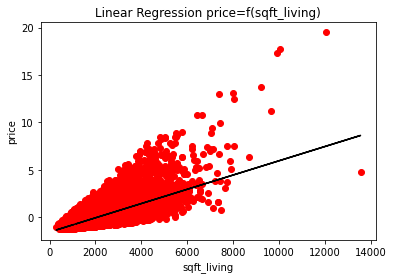

In [32]:
plt.scatter(X_sqft_living,Y_transfm,color='r')
plt.title("Linear Regression price=f(sqft_living)")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(X_sqft_living,Lrg_slv.predict(X_sqft_living),color="k")
plt.show()

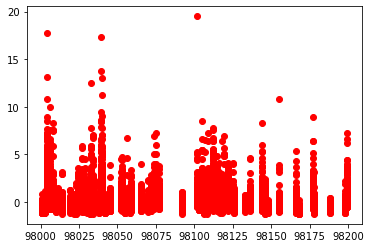

In [33]:
X_zipcode=df_copy.zipcode.values.reshape(-1,1)
plt.scatter(X_zipcode,Y_transfm,color='r')

There is no clear relationship between "price" and "zipcode"

In [35]:
X_mlt_lin=df_copy[["sqft_living","bathrooms","sqft_above","bedrooms","view","grade","sqft_living15","waterfront","sqft_basement"]]  #we have more than one input
X_train_mlt_lin, X_test_mlt_lin, y_train_mlt_lin, y_test_mlt_lin=train_test_split(X_mlt_lin,Y_transfm,test_size=0.33,random_state=42) #splitting data with test size of 35%

Lrg_mlt_lin=LinearRegression()   #build linear regression model
Lrg_mlt_lin.fit(X_train_mlt_lin,y_train_mlt_lin)  #fitting the training data
y_predicted_mlt_lin=Lrg_mlt_lin.predict(X_test_mlt_lin) #testing our model’s performance
y_rev_mlt_lin=StSc.inverse_transform(y_predicted_mlt_lin)

print("MSE", mean_squared_error(y_test_mlt_lin,y_predicted_mlt_lin))
print("R squared transfm", metrics.r2_score(y_test_mlt_lin,y_predicted_mlt_lin))


MSE 0.4492298212618157
R squared transfm 0.5956394377252101


According to the obtained values of MSE and R squared, the multi-linear regression is more performant that the linear regression.

In [45]:
from sklearn.preprocessing import PolynomialFeatures 
Lrg_mlt_pol=LinearRegression()   #build linear regression model

poly2=PolynomialFeatures(degree=2)

X_mlt_pol=df_copy[["sqft_living","bathrooms","sqft_above","bedrooms","view","grade","sqft_living15","waterfront","sqft_basement"]]  #we have more than one input
X_train_mlt_pol, X_test_mlt_pol, y_train_mlt_pol, y_test_mlt_pol=train_test_split(X_mlt_pol,Y_transfm,test_size=0.33,random_state=42) #splitting data with test size of 35%

X_train_mlt_pol_fit2 = poly2.fit_transform(X_train_mlt_pol) #transforming our input data

Lrg_mlt_pol.fit(X_train_mlt_pol_fit2,y_train_mlt_pol)  #fitting the training data

X_test_mlt_pol_fit2 = poly2.fit_transform(X_test_mlt_pol) #transforming our input data

y_predicted_mlt_pol2=Lrg_mlt_pol.predict(X_test_mlt_pol_fit2) #testing our model’s performance


print("MSE", mean_squared_error(y_test_mlt_pol,y_predicted_mlt_pol2))
print("R squared transfm", metrics.r2_score(y_test_mlt_pol,y_predicted_mlt_pol2))


MSE 0.39328466397571854
R squared transfm 0.6459967697322797


Obviously, we can notice an improvement in the results when we used the multi-polynomial regression algorithm with our data.
Another information that can be taken from this adjustment is that when increasing the degree of the polynomial regression model (example degree=3), the result does not necessarily improve